
For those interested in running notebooks on their machines you can find instructions here: https://janakiev.com/blog/jupyter-virtual-envs/

Intro to python virtualenv: https://realpython.com/python-virtual-environments-a-primer/


Metrics cheatsheet:
https://stanford.edu/~shervine/teaching/cs-229/cheatsheet-machine-learning-tips-and-tricks

ML good practices from google:
https://developers.google.com/machine-learning/guides/rules-of-ml#ml_phase_ii_feature_engineering

https://scikit-learn.org/stable/modules/cross_validation.html#k-fold


## 1. Load data

In [1]:
from sklearn.datasets import load_iris
from sklearn.datasets import load_wine

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

iris_dataset=load_iris()

def sklearn_to_df(sklearn_dataset):
    df = pd.DataFrame(sklearn_dataset.data, columns=sklearn_dataset.feature_names)
    df['target'] = pd.Series(sklearn_dataset.target)
    return df

df_iris = sklearn_to_df(iris_dataset)
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', df_iris.shape[1]+1)

df_iris.head(150)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## 2. Do a quick data exploration

([], [])

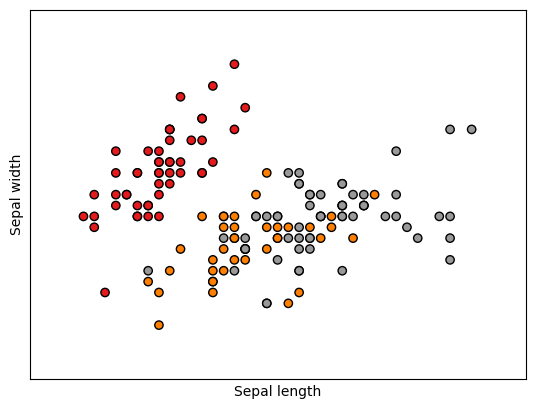

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

X = iris_dataset.data
y = iris_dataset.target
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

In [3]:
df_iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


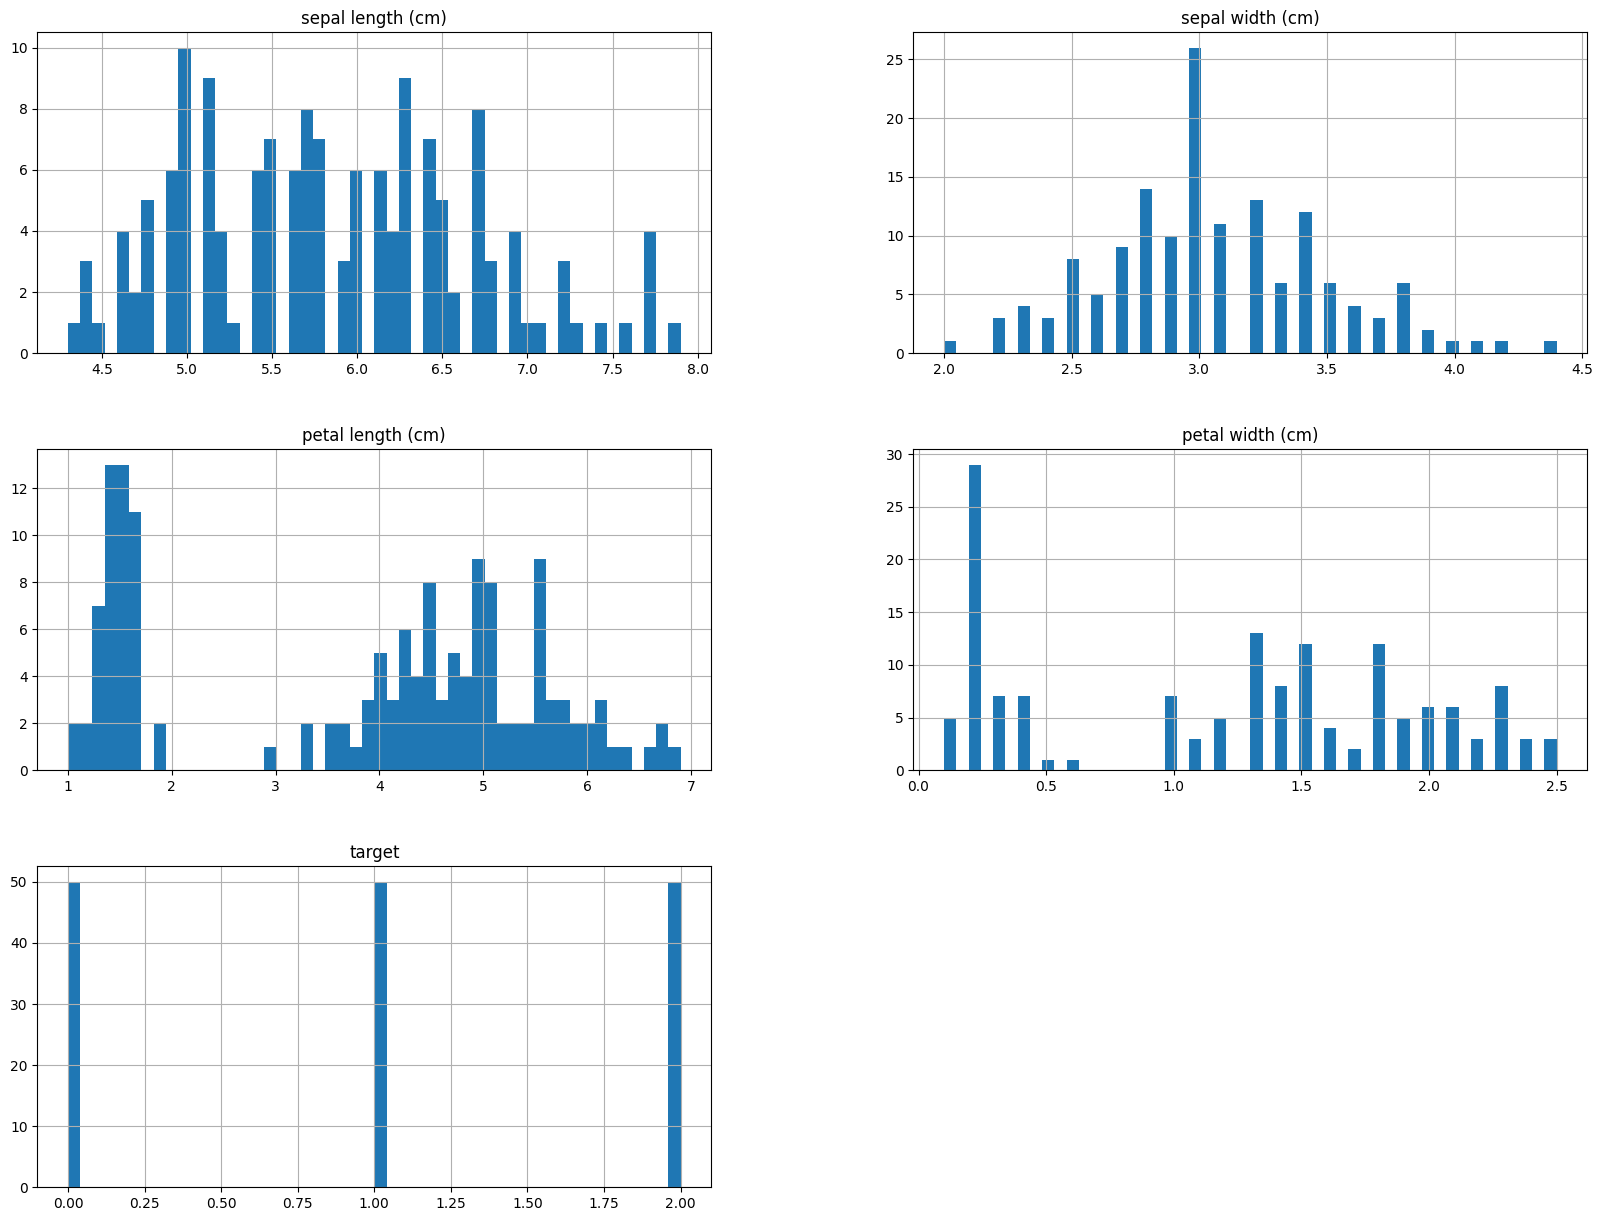

In [4]:
import matplotlib.pyplot as plt
df_iris.hist(bins=50, figsize=(20,15))
plt.show()

array([[<Axes: xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='target', ylabel='sepal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='target', ylabel='sepal width (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='

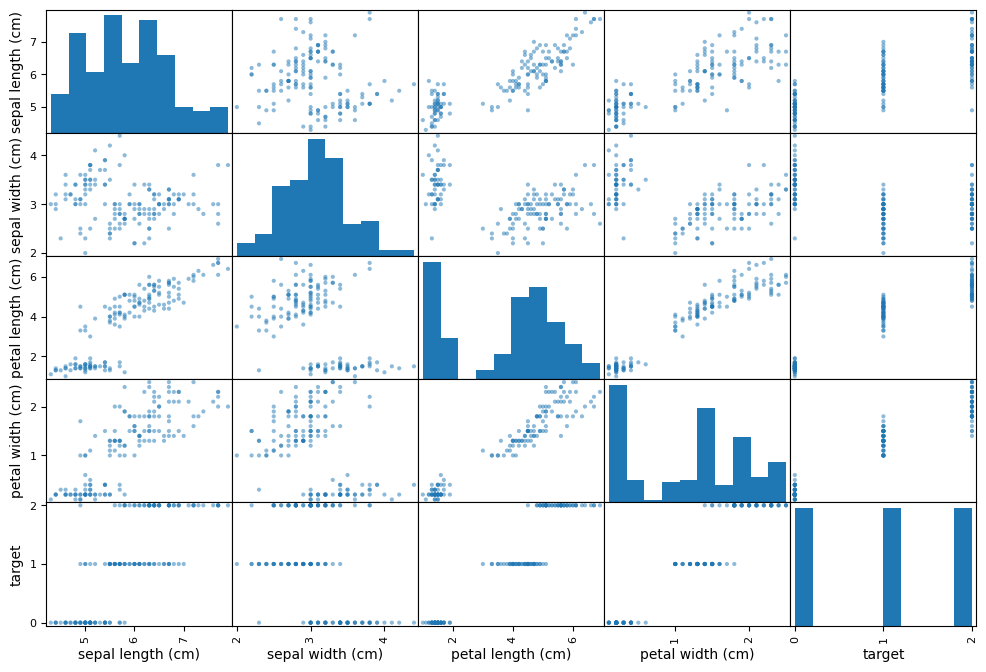

In [5]:
from pandas.plotting import scatter_matrix

attributes = df_iris.columns
scatter_matrix(df_iris[attributes], figsize=(12, 8))

## 3. Data preparation


### 3.1 Data cleaning

Most Machine Learning algorithms cannot work with missing features.
So what we can do is:
1. Get rid of the corresponding records (rows).
2. Get rid of the whole attribute (columns).
3. Set the values to some value (zero, the mean, the median, etc.).

# Task 1

In [6]:
# TODO - write three functions that handle each of three above data cleaning methods
def drop_missing_values(df):
    df.dropna(inplace=True)
    return df

def drop_columns_with_missing_values(df):
    df.dropna(axis=1, inplace=True)
    return df

def fill_missing_values_with_zero(df):
    df.fillna(0, inplace=True)
    return df

def fill_missing_values_with_mean(df):
    df.fillna(df.mean(), inplace=True)
    return df

def fill_missing_values_with_median(df):
    df.fillna(df.median(), inplace=True)
    return df

Scikit-Learn provides a handy class to take care of missing values: SimpleImputer

In [7]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
X = df_iris.drop('target', axis=1)
# median can be trained only on numerical values, so we drop all categorical columns and fit it
imputer.fit(X)
# now we can use it
X_transformed = imputer.transform(X)


### 3.2 Feature Scaling
One of the most important transformations you need to apply to your data is feature scaling. With few exceptions, Machine Learning algorithms don’t perform well when the input numerical attributes have very different scales.

There are two common ways to get all attributes to have the same scale: min-max scaling and standardization.

**Min-max scaling** (many people call this normalization) is the simplest: values are shifted and rescaled so that they end up ranging from 0 to 1. We do this by subtracting the min value and dividing by the max minus the min. Scikit-Learn provides a transformer called MinMaxScaler for this. It has a feature_range hyperparameter that lets you change the range if, for some reason, you don’t want 0–1.

**Standardization** is different: first it subtracts the mean value (so standardized values always have a zero mean), and then it divides by the standard deviation so that the resulting distribution has unit variance. Unlike min-max scaling, standardization does not bound values to a specific range, which may be a problem for some algorithms (e.g., neural networks often expect an input value ranging from 0 to 1). However, standardization is much less affected by outliers. For example, suppose a feature had a median value equal to 100 (by mistake). Min-max scaling would then crush all the other values from 0–15 down to 0–0.15, whereas standardization would not be much affected. Scikit-Learn provides a transformer called StandardScaler for standardization.

## 4. Train - test split

- **Train Dataset:** Used to fit the machine learning model.

- **Test Dataset**: Used to evaluate the fit machine learning model.

The objective is to estimate the performance of the machine learning model on new data: data not used to train the model.

The train-test procedure is not appropriate when the dataset available is small. The reason is that when the dataset is split into train and test sets, there will not be enough data in the training dataset for the model to learn an effective mapping of inputs to outputs.

If you have insufficient data, then a suitable alternate model evaluation procedure would be the k-fold cross-validation procedure.

On the other hand some models are very costly to train, and in that case, repeated evaluation used in other procedures is intractable. An example might be deep neural network models. In this case, the train-test procedure is commonly used.

Common split percentages include:

- Train: 80%, Test: 20%
- Train: 67%, Test: 33%
- Train: 50%, Test: 50%

Another important consideration is that rows are assigned to the train and test sets randomly. This is done to ensure that datasets are a representative sample (e.g. random sample) of the original dataset.

In [8]:
from collections import Counter

X_train, X_test, y_train, y_test = train_test_split(iris_dataset["data"],
      iris_dataset["target"], train_size=0.6, random_state=49)

print(X_train.shape)
print(Counter(y_train))
print(Counter(y_test))

(90, 4)
Counter({0: 33, 1: 33, 2: 24})
Counter({2: 26, 1: 17, 0: 17})


Some classification problems do not have a balanced number of examples for each class label. As such, it is desirable to split the dataset into train and test sets in a way that preserves the same proportions of examples in each class as observed in the original dataset. This is called a **stratified train-test split**.

In [9]:
from collections import Counter

X_train_stratified, X_test_stratified, y_train_stratified, y_test_stratified = train_test_split(iris_dataset["data"], iris_dataset["target"], train_size=0.6, random_state=49, stratify=iris_dataset["target"])
print(Counter(y_train_stratified))
print(Counter(y_test_stratified))


Counter({1: 30, 2: 30, 0: 30})
Counter({1: 20, 2: 20, 0: 20})


## 5. Train model

In [10]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=5)
kn.fit(X_train, y_train)

KNeighborsClassifier()

## 6. Measure it

### Confusion matrix

The confusion matrix is used to have a more complete picture when assessing the performance of a model.

Source: https://stanford.edu/~shervine/teaching/cs-229/cheatsheet-machine-learning-tips-and-tricks#model-selection

[Text(0, 0.5, 'setosa'), Text(0, 1.5, 'versicolor'), Text(0, 2.5, 'virginica')]

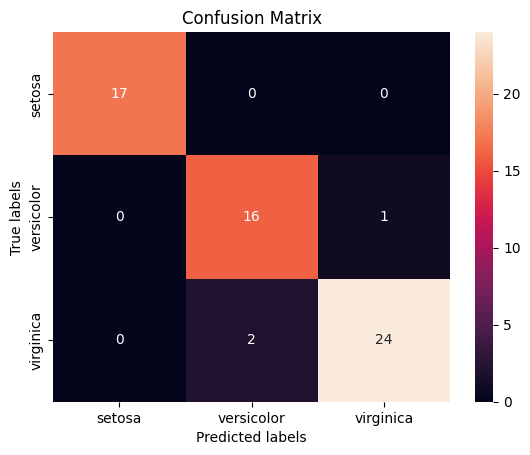

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

y_pred = kn.predict(X_test)
cm = confusion_matrix (y_test, y_pred)

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(iris_dataset.target_names);
ax.yaxis.set_ticklabels(iris_dataset.target_names)

### Accuracy - Overall performance of model

Accuracy is the ratio of the total number of correct predictions and the total number of predictions.


In [12]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.95

### Precision - How accurate the positive predictions are.

Precision is the ratio between the True Positives and all the Positives. For example, that would be the measure of patients that we correctly identify having a heart disease out of all the patients actually having it. Precision also gives us a measure of the relevant data points. It is important that we don’t start treating a patient who actually doesn’t have a heart ailment, but our model predicted as having it.

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html

In [13]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred, average=None)

array([1.        , 0.88888889, 0.96      ])

### Recall / Sensitivity - Coverage of actual positive sample

The recall is the measure of our model correctly identifying True Positives. Thus, for all the patients who actually have heart disease, recall tells us how many we correctly identified as having a heart disease.

Recall also gives a measure of how accurately our model is able to identify the relevant data. We refer to it as Sensitivity or True Positive Rate. What if a patient has heart disease, but there is no treatment given to him/her because our model predicted so? That is a situation we would like to avoid

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html

In [14]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred, average=None)

array([1.        , 0.94117647, 0.92307692])

Normally we should aim for high precision and high recall value, achieving both at the same time is not possible.

For example, if we change the model to one giving us a high recall, we might detect all the patients who actually have heart disease, but we might end up giving treatments to a lot of patients who don’t suffer from it.

Similarly, if we aim for high precision to avoid giving any wrong and unrequired treatment, we end up getting a lot of patients who actually have a heart disease going without any treatment.

We need a tradeoff between Precision and Recall. But we also need to decide which is more important for our classification problem.

There are also a lot of situations where both precision and recall are equally important. For example, for our model, if the doctor informs us that the patients who were incorrectly classified as suffering from heart disease are equally important since they could be indicative of some other ailment, then we would aim for not only a high recall but a high precision as well.

### F1 score - Hybrid metric useful for unbalanced classes

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html

In [15]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='weighted')

0.9502240896358544

### Or use a report for this

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.89      0.94      0.91        17
           2       0.96      0.92      0.94        26

    accuracy                           0.95        60
   macro avg       0.95      0.95      0.95        60
weighted avg       0.95      0.95      0.95        60



## k-Fold Cross-Validation
Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample.

The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into.

Cross-validation is primarily used in applied machine learning to estimate the skill of a machine learning model on unseen data. That is, to use a limited sample in order to estimate how the model is expected to perform in general when used to make predictions on data not used during the training of the model.

The general procedure is as follows:

1. Shuffle the dataset randomly.
2. Split the dataset into k groups
3. For each unique group:
    1. Take the group as a hold out or test data set
    2. Take the remaining groups as a training data set
    3. Fit a model on the training set and evaluate it on the test set
    4. Retain the evaluation score and discard the model
4. Summarize the skill of the model using the sample of model evaluation scores

Each observation in the data sample is assigned to an individual group and stays in that group for the duration of the procedure. This means that each sample is given the opportunity to be used in the hold out set 1 time and used to train the model k-1 times.

A value of k=10 is very common in the field of applied machine learning, and is recommend if you are struggling to choose a value for your dataset.

The performance measure reported by k-fold cross-validation is then the average of the values computed in the loop.


Source: https://scikit-learn.org/stable/modules/cross_validation.html#k-fold



In [17]:
from sklearn.model_selection import cross_val_score

clf = KNeighborsClassifier(n_neighbors=5)

scores = cross_val_score(clf, iris_dataset['data'], iris_dataset['target'], cv=10)

print(scores.mean())

0.9666666666666668


## Task 2
Write an implementation of stratified k-fold cross validation.

You can use `StratifiedKFold` class from scikit

In [18]:
def cross_val(clf, X, y, cv=10):
    from sklearn.model_selection import StratifiedKFold
    skf = StratifiedKFold(n_splits=cv)
    skf.get_n_splits(X, y)
    scores = []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        clf.fit(X_train, y_train)
        scores.append(clf.score(X_test, y_test))
    return np.mean(scores)


# How to search for best parameters?

One option would be to fiddle with the hyperparameters manually, until you find a great combination of hyperparameter values.

Instead, we should get Scikit-Learn’s GridSearchCV to search for us.

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
parameters = {'criterion':['gini', 'entropy'], 'max_depth':[1, 5, 10, 20]}
clf = GridSearchCV(tree, parameters, cv=10, scoring='accuracy', return_train_score=True)
clf.fit(iris_dataset['data'], iris_dataset['target'])


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 5, 10, 20]},
             return_train_score=True, scoring='accuracy')

In [20]:
clf.best_params_

{'criterion': 'gini', 'max_depth': 5}

In [21]:
clf.best_estimator_


DecisionTreeClassifier(max_depth=5)